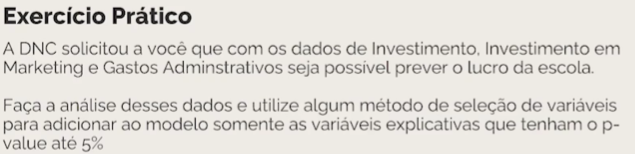

In [2]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
# Importando a base
df = pd.read_excel(r"C:\Users\alexa\OneDrive\Área de Trabalho\repositorios_git\DNC_repository\exe_regressao_linear_multipla\exercicio_lucro.xlsx")
df.head()

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
0,0,45173,116984,14681
1,542,0,51743,35673
2,0,0,135427,42560
3,1315,297114,115816,49491
4,1000,1904,124153,64926


In [7]:
# Correlação
df.corr()

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
Investimento,1.000000,0.661913,0.243497,0.896767
Investimento_Mkt,0.661913,1.000000,-0.046715,0.716677
Gastos_Administrativos,0.243497,-0.046715,1.000000,0.200720
Lucro,0.896767,0.716677,0.200720,1.000000


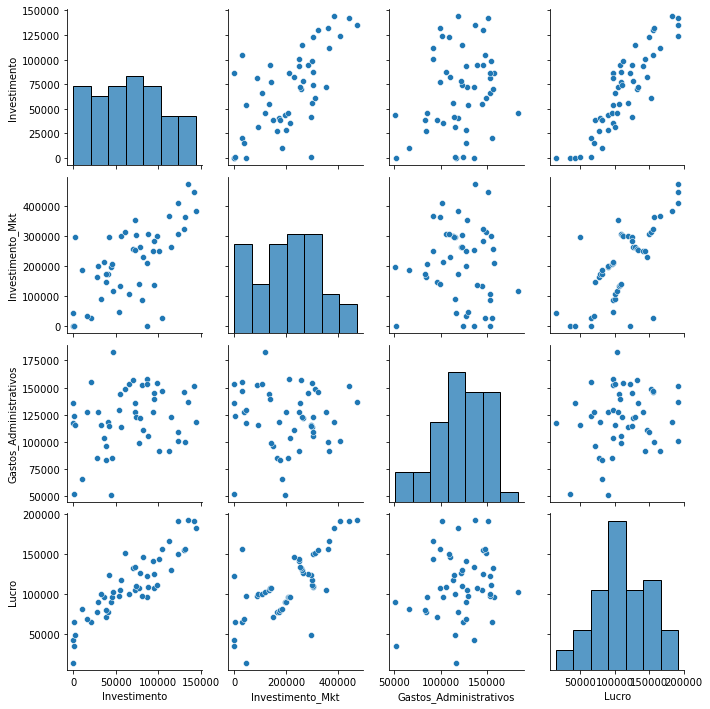

In [8]:
# Análise estatisticas das colunas
sns.pairplot(df);

In [9]:
df.columns

Index(['Investimento', 'Investimento_Mkt', 'Gastos_Administrativos', 'Lucro'], dtype='object')

In [11]:
#modelo MRLS
function = 'Lucro~Investimento+Investimento_Mkt+Gastos_Administrativos'
# primeira variável é a preditiva, separado por '~' e o restante são as explicativas, separadas por '+'
model = smf.ols(formula=function, data=df).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     75.97
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           7.60e-18
Time:                        21:05:55   Log-Likelihood:                -556.05
No. Observations:                  50   AIC:                             1120.
Df Residuals:                      46   BIC:                             1128.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.21

In [12]:
#Remover a variável RendimentoTotal que tem o maior P-value
#Ainda temos variáveis acima de 5%
function = 'Lucro~Investimento+Investimento_Mkt'
model = smf.ols(formula=function, data=df).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     115.7
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           7.01e-19
Time:                        21:06:56   Log-Likelihood:                -556.18
No. Observations:                  50   AIC:                             1118.
Df Residuals:                      47   BIC:                             1124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.758e+04   5004.534  